"""
@authors: Marcin Grelewicz (s17692), Edyta Bartos (s17699)
based on scikit-fuzzy library usage examples: https://pythonhosted.org/scikit-fuzzy/

Fuzzy logic theory (link: https://www.guru99.com/what-is-fuzzy-logic.html), which basically means that the truth values of variables may be any real number between 0 and 1 both inclusive. It is employed to handle the concept of partial truth, where the truth value may range between completely true and completely false.

The code is written in python: https://www.python.org/download/releases/3.0/

"""

Migraine problem.

Sometimes can happen that you suffer a very strong migraine attack on the trip or at work where you don't have your medications with you. As you don't have typical migraine aura, you never know when it can come and after 1 or 2 hrs when you finally get to the farmacy it is very often too late to kill the pain.

Goal: This fuzzy control system will help you with choosing optimal dosis of your medication before your headache comes.

Description: Usually there are 5 factors which are strongly related to the migraine attack: sleep quality, diet quality, emotional wellness, weather quality, physical wellness. The idea is to rate them between 0-10, where 0 means poor, 5 average and 10 good.

We would formulate this problem as:

    Antecednets (Inputs)
    
        SLEEP QUALITY:
            Universe (ie, crisp value range): How good was your sleep quality last 3 days, on a scale of 0 to 10?
            Fuzzy set (ie, fuzzy value range): poor, average, good
            
        DIET QUALITY:
            Universe: How rich and varied were your dishes in recent 3 days, on a scale of 0 to 10?
            Fuzzy set: poor, average, good
            
        EMOTIONAL WELLNESS:
            Universe (ie, crisp value range): How relaxed were your last 3 days, on a scale of 0 to 10?
            Fuzzy set (ie, fuzzy value range): poor, average, good
            
        WEATHER QUALITY:
            Universe (ie, crisp value range): How windy is it now, on a scale of 0 to 10?
            Fuzzy set (ie, fuzzy value range): poor, average, good
            
        PHYSICAL WELLNESS:
            Universe (ie, crisp value range): How tired are you now, on a scale of 0 to 10?
            Fuzzy set (ie, fuzzy value range): low, medium, high

    Consequents (Outputs)

            medical recommendation: 
                    Universe: You shouldn't take any pills in range from 0-1, you should take 1 pill from 1-2, 2 pills from 2-3 and from 3-4 it is highly recommended to visit the doctor.
                    Fuzzy set: low, medium, high
                   

    Rules
    
            IF the sleep quality was poor or diet quality was poor or... THEN the dose of your migraine medicine should be high.
            IF the sleep quality was average or diet quality was average or... THEN the dose should be medium.
            IF the sleep quality was good or diet quality was good or... THEN the dose will be low.   

    Usage

            If I tell this controller that I rated:
                    sleep quality: 5
                    diet quality: 8
                    emotional wellness: 1
                    weather quality: 1
                    physical wellness: 1


            it would recommend: "If you already feel bad take 2 pills, if not make sure you have 2 pills in your bag before going anywhere even though we recommend you to stay home...".

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership functions
sleep_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'sleep_quality')
diet_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'diet_quality')
emotional_wellness = ctrl.Antecedent(np.arange(0, 11, 1), 'emotional_wellness')
weather_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'weather_quality')
physical_wellness = ctrl.Antecedent(np.arange(0, 11, 1), 'physical_wellness')

drug_dosage = ctrl.Consequent(np.arange(0, 5, 1), 'drug_dosage')

# Auto-membership function population is possible with .automf(3, 5, or 7)
sleep_quality.automf(3)
diet_quality.automf(3)
emotional_wellness.automf(3)
weather_quality.automf(3)
physical_wellness.automf(3)

# Custom membership functions can be built interactively with a familiar, Pythonic API
drug_dosage['low'] = fuzz.trimf(drug_dosage.universe, [0, 0, 2])
drug_dosage['medium'] = fuzz.trimf(drug_dosage.universe, [0, 2, 4])
drug_dosage['high'] = fuzz.trimf(drug_dosage.universe, [2, 4, 4])

C:\Users\Edyta\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


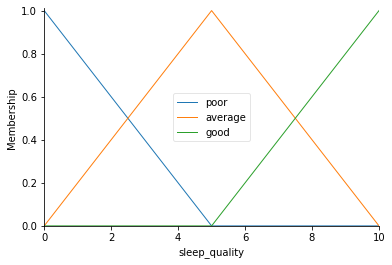

In [14]:
# You can see how these look with .view()
sleep_quality.view()

C:\Users\Edyta\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


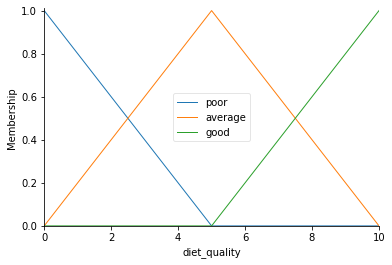

In [15]:
diet_quality.view()

C:\Users\Edyta\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


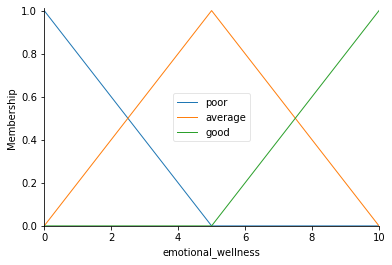

In [16]:
emotional_wellness.view()

C:\Users\Edyta\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


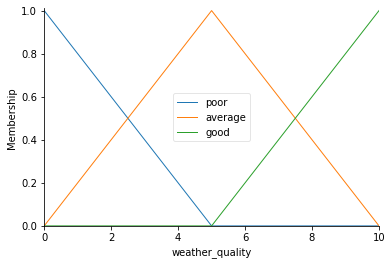

In [17]:
weather_quality.view()

C:\Users\Edyta\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


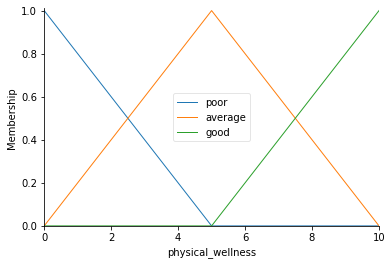

In [18]:
physical_wellness.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18e310e8a58>)

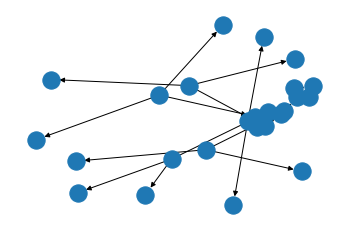

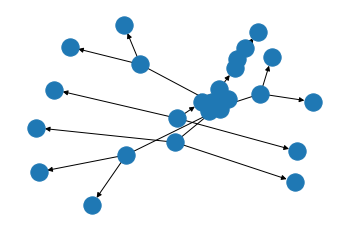

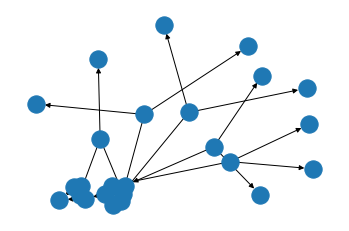

In [19]:
rule1 = ctrl.Rule(sleep_quality['poor'] | diet_quality['poor'] | emotional_wellness['poor'] | weather_quality['poor'] | physical_wellness['poor'], drug_dosage['high'])
rule2 = ctrl.Rule(sleep_quality['average'] | diet_quality['average'] | emotional_wellness['average'] | weather_quality['average'] | physical_wellness['average'], drug_dosage['medium'])
rule3 = ctrl.Rule(sleep_quality['good'] | diet_quality['good'] | emotional_wellness['good'] | weather_quality['good'] | physical_wellness['good'], drug_dosage['low'])

rule1.view()
rule2.view()
rule3.view()

In [20]:
dosaging_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [21]:
dosaging = ctrl.ControlSystemSimulation(dosaging_ctrl)

In [52]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API

your_sleep_quality = input("How good was your sleep last 3 days from 1 to 10?: ")
dosaging.input['sleep_quality'] = int(your_sleep_quality)

your_diet_quality = input("How rich and varied was your food last 3 days from 1 to 10?: ")
dosaging.input['diet_quality'] = int(your_diet_quality)

your_emotional_wellness = input("How do you feel emotionally last 3 days from 1 to 10?: ")
dosaging.input['emotional_wellness'] = int(your_emotional_wellness)

your_weather_quality = input("How is the weather like today from 1 to 10?: ")
dosaging.input['weather_quality'] = int(your_weather_quality)

your_physical_wellness = input("How do you feel physically last 3 days from 1 to 10?: ")
dosaging.input['physical_wellness'] = int(your_physical_wellness)


# Crunch the numbers
dosaging.compute()

How good was your sleep last 3 days from 1 to 10?: 8
How rich and varied was your food last 3 days from 1 to 10?: 7
How do you feel emotionally last 3 days from 1 to 10?: 5
How is the weather like today from 1 to 10?: 2
How do you feel physically last 3 days from 1 to 10?: 5


1.9999999999999998


C:\Users\Edyta\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


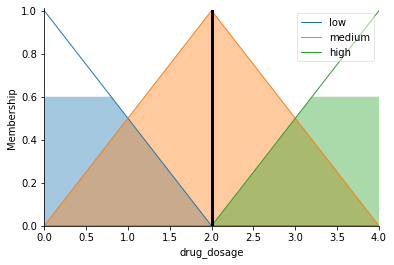

In [53]:
print(dosaging.output['drug_dosage'])
drug_dosage.view(sim=dosaging)

In [54]:
if dosaging.output['drug_dosage'] <= 1.7:
    print("Congrats! You don't need any pill for today!")
elif dosaging.output['drug_dosage'] > 1.7 and dosaging.output['drug_dosage'] <=2:
    print("If you already feel bad take 1 pill, if not, make sure you have" \
          " 1 pill in your bag before going anywhere")
elif dosaging.output['drug_dosage'] > 2 and dosaging.output['drug_dosage'] <=2.3:
    print("If you already feel bad take 2 pills, if not, take 1 pill and" \
          " make sure you have 1 more pill in your bag before going anywhere.")
else:
    print("You should take 2 pills, stay home or even go to the doctor if needed.")

If you already feel bad take 1 pill, if not, make sure you have 1 pill in your bag before going anywhere
